<font color=#cccccc>Credit Card customers (Predict Churning customers)</font>
==

<font color=#cccccc>Library Import</font>
==

In [1]:
import copy

import warnings
warnings.filterwarnings(action='ignore') 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

# 결측치
import missingno as msno

import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import model_selection, linear_model
from sklearn.metrics import auc
from sklearn.metrics import classification_report

# 파이프라인
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Import libraries for resampling
import sklearn.neighbors._base

In [2]:
#ML Train model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from lightgbm.sklearn import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score

In [3]:
#Resampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTEENN
from sklearn.model_selection import StratifiedShuffleSplit

In [4]:
# !pip install vecstack==0.4.0
from vecstack import stacking

In [ ]:
!apt install fonts-nanum -y #한글font 사용하기

In [5]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

<font color=#cccccc>Data Load</font>
==

In [6]:
df = pd.read_csv('data/BankChurners.csv')
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998


![title](image.jpg)

<font color=#cccccc>Data Information</font>
==

In [7]:
# PLEASE IGNORE THE LAST 2 COLUMNS (NAIVE BAYES CLAS…). I SUGGEST TO RATHER DELETE IT BEFORE DOING ANYTHING**
# 이라고 계시자의 언급이 있었으므로 2 COLUMNS 와  Random Number/Index역할인 Client Number 는 삭제

df.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
        axis=1, inplace=True )

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [9]:
cat_col = [x for x in df.columns if df[x].dtype == 'O']
num_col = [x for x in df.columns if x not in cat_col]

print('cat_col : {} \n\
num_col : {}'.format(len(cat_col), len(num_col)))

cat_col : 6 
num_col : 14


### <font color=yellow>Categorical Column</font>

In [ ]:
# fig = plt.figure(figsize=(40, 20))
# fig.subplots_adjust(hspace=0.8, wspace=0.8)

# for i,var in enumerate(cat_col):
#     tmp = df[var].value_counts().reset_index()
#     ax = fig.add_subplot(2, 3, i+1)
#     ax.bar(tmp['index'], tmp[var], color=['dimgray','darkorange','limegreen','cornflowerblue','lightcoral','mediumpurple'])
#     ax.set_title(var, fontsize = 20)
#     ax.set_xticklabels(tmp['index'], rotation=90)
#     plt.xticks(color='#F3F781', fontsize =20) 
#     plt.yticks(color='#F3F781', fontsize =20) 


In [10]:
# Attrition_Flag를 x축으로 하여 범주형 변수를 카운트 해줄 함수를 선언 

def bar_chart(feature, ax=None): # feature <- 열 이름, ax <- subplot 객체 
    attrited = df[df['Attrition_Flag']=='Attrited Customer'][feature].value_counts()
    exist = df[df['Attrition_Flag']=='Existing Customer'][feature].value_counts()
    
    df_plot = pd.DataFrame([attrited, exist])
    df_plot.index = ['Attrited', 'Exist']
    
    df_plot.plot(kind='bar', stacked=True, ax=ax)

Text(0.5, 1.0, '카드등급')

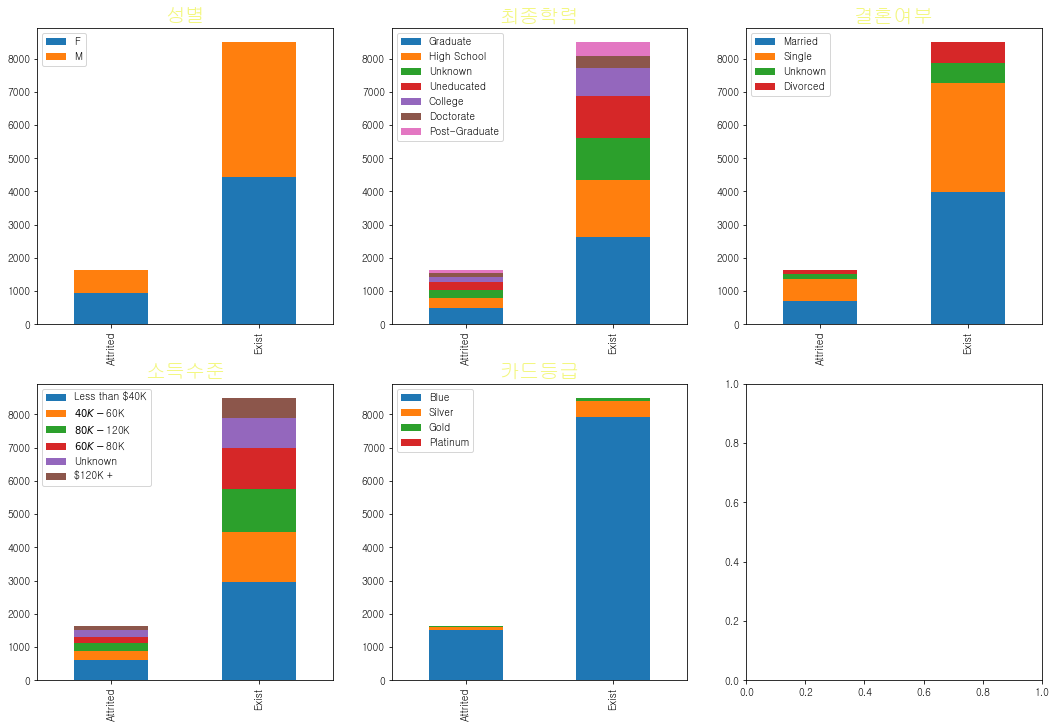

In [11]:
# sub플롯을 행렬형태로 띄우기 위하여 튜플 형태의 ax 변수를 선언
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,12)


bar_chart('Gender', ax1)
bar_chart('Education_Level', ax2)
bar_chart('Marital_Status', ax3)
bar_chart('Income_Category', ax4)
bar_chart('Card_Category', ax5)

# ax1.set(title="성별")
ax1.set_title('성별', color='#F3F781', fontsize =20)
ax2.set_title('최종학력', color='#F3F781', fontsize =20)
ax3.set_title('결혼여부', color='#F3F781', fontsize =20)
ax4.set_title('소득수준', color='#F3F781', fontsize =20)
ax5.set_title('카드등급', color='#F3F781', fontsize =20)

### <font color=yellow>Numerical Column</font>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B234180B38>,
      dtype=object)

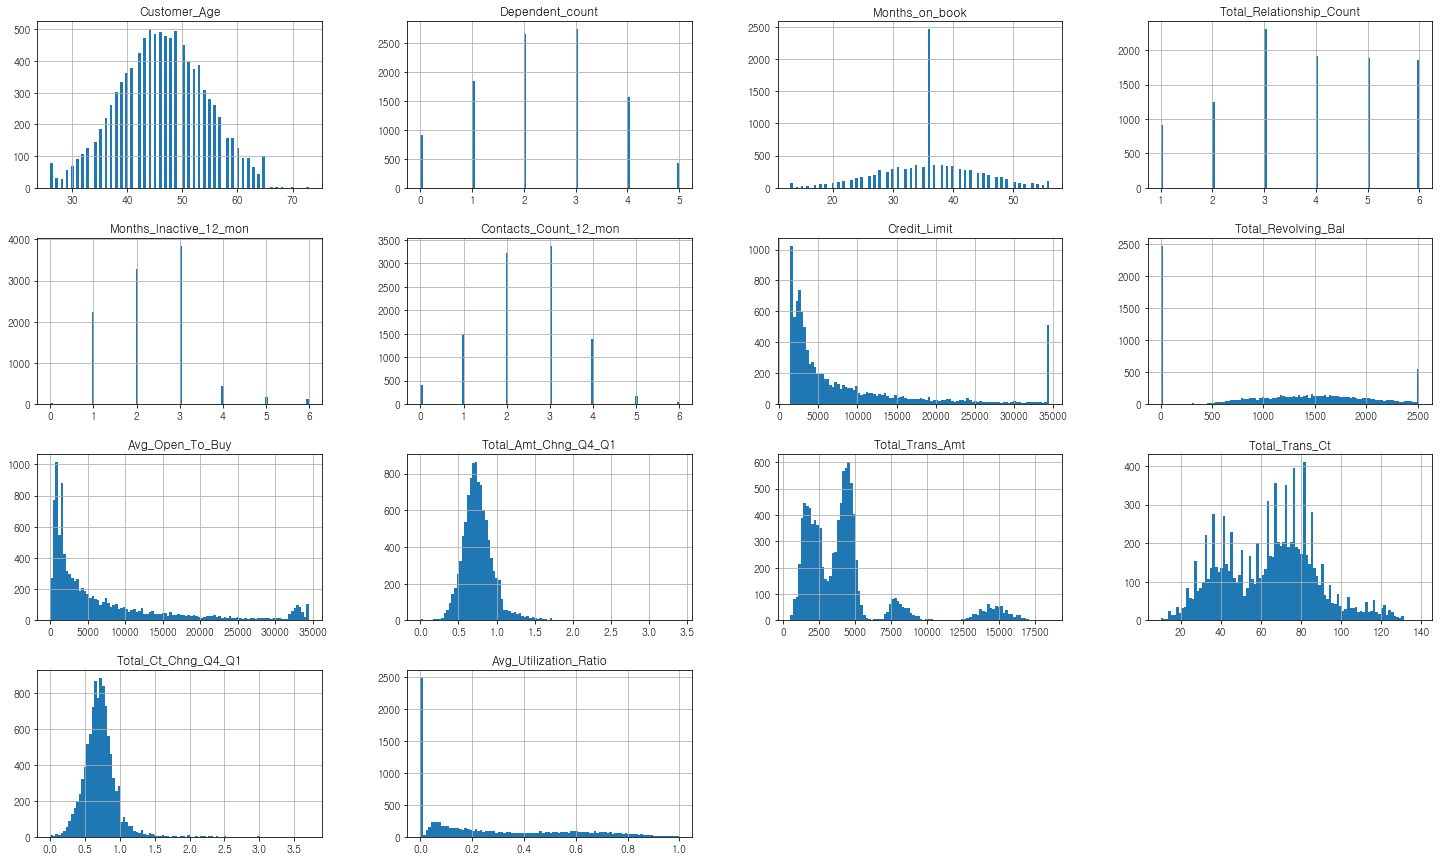

In [51]:
# bins : 막대그래프의 너비(영역)을 몇으로 채울것인지 결정해주는 변수
df_num = df[num_col]
df_num.hist(bins=100, figsize=(25,15))

###  <font color=yellow>Target Column Distribution(Categorical)</font>

In [13]:
data_explode = pd.read_csv('data/BankChurners.csv')
data_explode.drop(data_explode.columns[-2:], axis=1, inplace=True) 
data_explode.drop(data_explode.columns[0], axis=1, inplace=True)


from sklearn.model_selection import StratifiedShuffleSplit
#계층을 고려하여 무작위로 데이터 세트를 분할
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=10)

for train_index, test_index in split.split(data_explode, data_explode["Attrition_Flag"]):
    train_set = data_explode.loc[train_index]
    test_set = data_explode.loc[test_index]
    
target = 'Attrition_Flag'
train_set[target] = train_set[target].map({'Existing Customer':0, 'Attrited Customer':1})
test_set[target] = test_set[target].map({'Existing Customer':0, 'Attrited Customer':1})

churn = train_set.copy()

num_vars = list(churn.select_dtypes(include=[np.number]).columns)
cat_vars = list(churn.select_dtypes(include=['object']).columns)
num_vars.remove('Attrition_Flag')

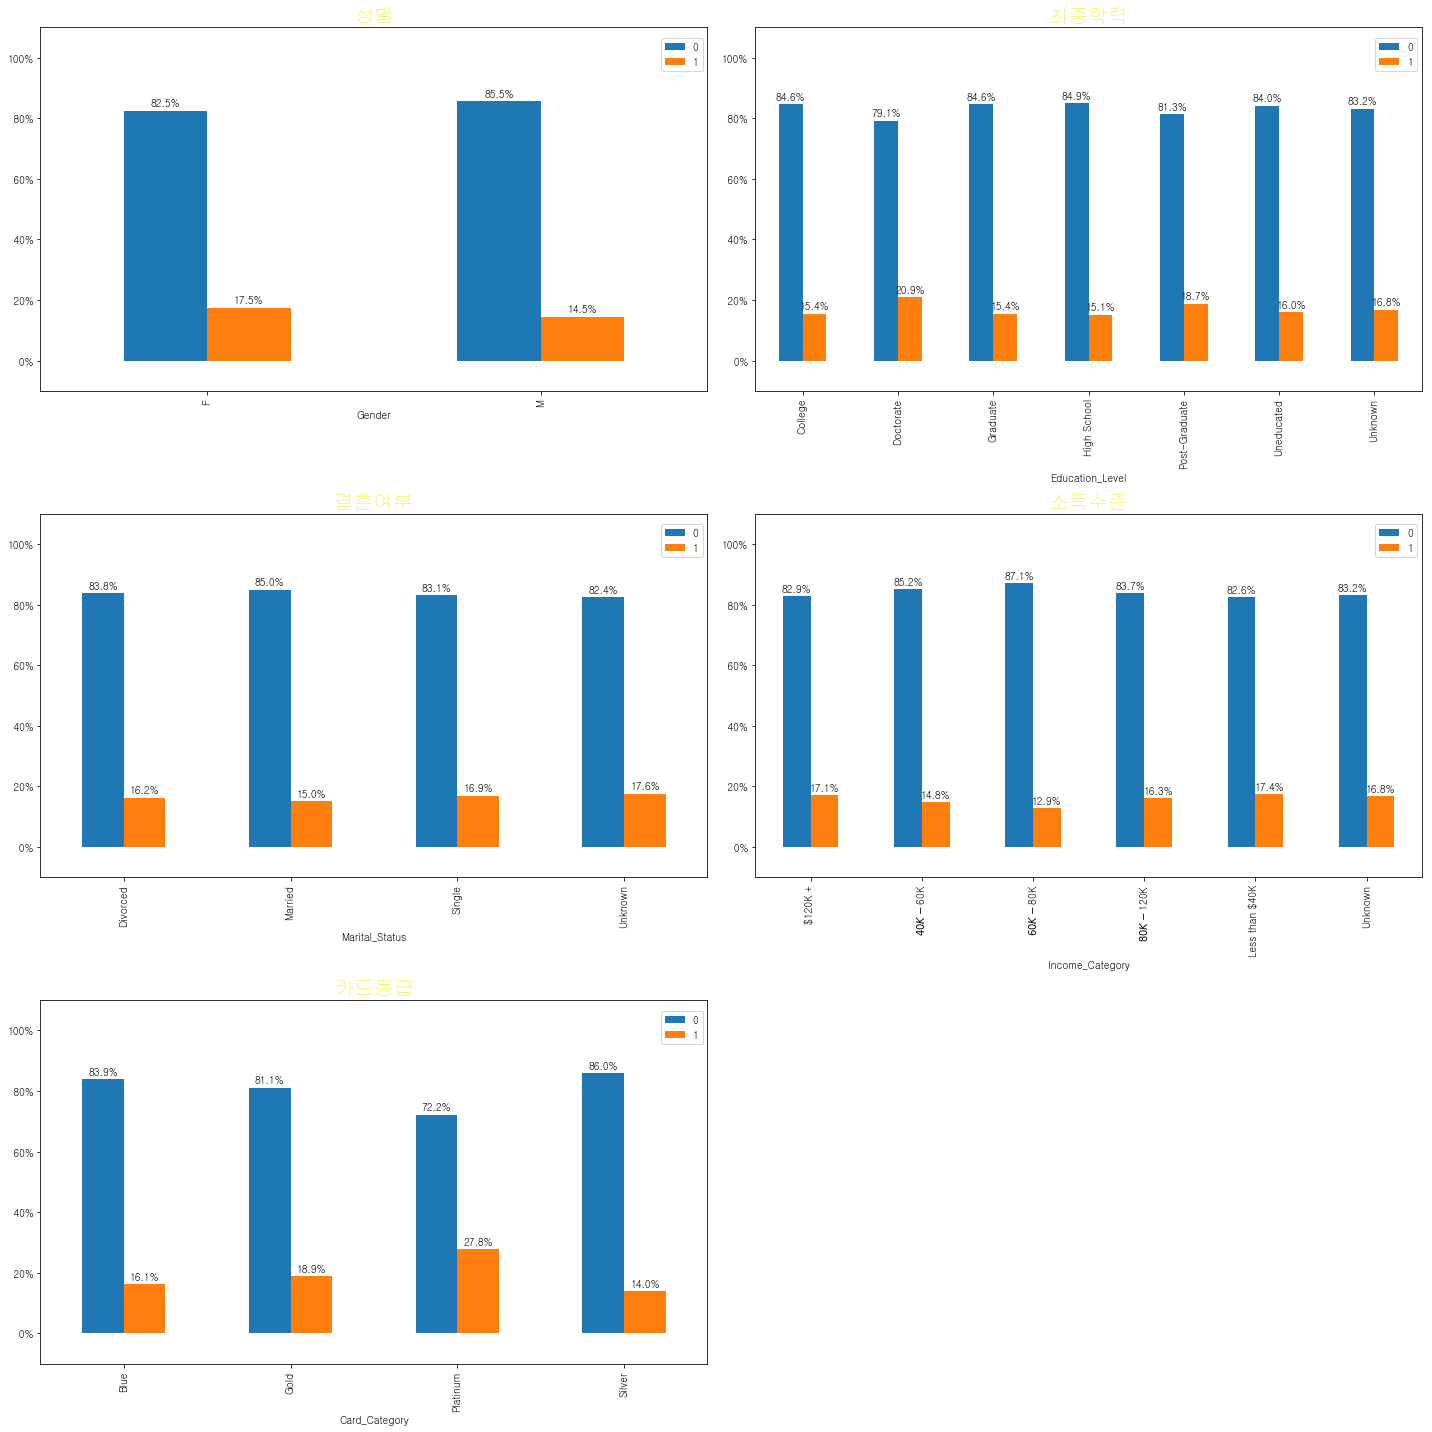

In [14]:
def plt_hue_cat(df, cat, target='Attrition_Flag', title=None, ax=None):
    #Create crosstab
    table = pd.crosstab(index=df[cat], columns=churn[target], normalize='index')
    
    if ax==None:
        fig, ax = plt.subplots()
    table.plot.bar(ax=ax)
    
    max_height = max([p.get_height() for p in ax.patches])
    min_height = min([p.get_height() for p in ax.patches])
    
    for i,p in enumerate(ax.patches):
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{table.unstack().iloc[i]:.1%}', (x + width/2, y+height+min_height*0.1), ha='center')
         
    
    ylim=max_height+max_height
    ax.set_ylim(-.1, 1.1)
    y_vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x * 100) for x in y_vals])
    
    
    if title==None:
        title=cat
        if title == 'Gender':
            title = '성별'
        elif title == 'Education_Level':
            title = '최종학력'
        elif title == 'Marital_Status':
            title = '결혼여부'
        elif title == 'Income_Category':
            title = '소득수준'
        else :
                title = '카드등급'
    ax.set_title(title, color='#F3F781', fontsize =20)
    ax.legend(loc=(0.93,0.88))
    plt.tight_layout()
    
rows = len(cat_vars)//2+1
fig, axes = plt.subplots(rows, 2, figsize=(20,20))
axes = axes.ravel()
axes[-1].remove()

for i in range(len(cat_vars)):
    cat = cat_vars[i]
    plt_hue_cat(df=churn, cat=cat, ax=axes[i])

plt.show()

###  <font color=yellow>Target Column Distribution(Numerical)</font>

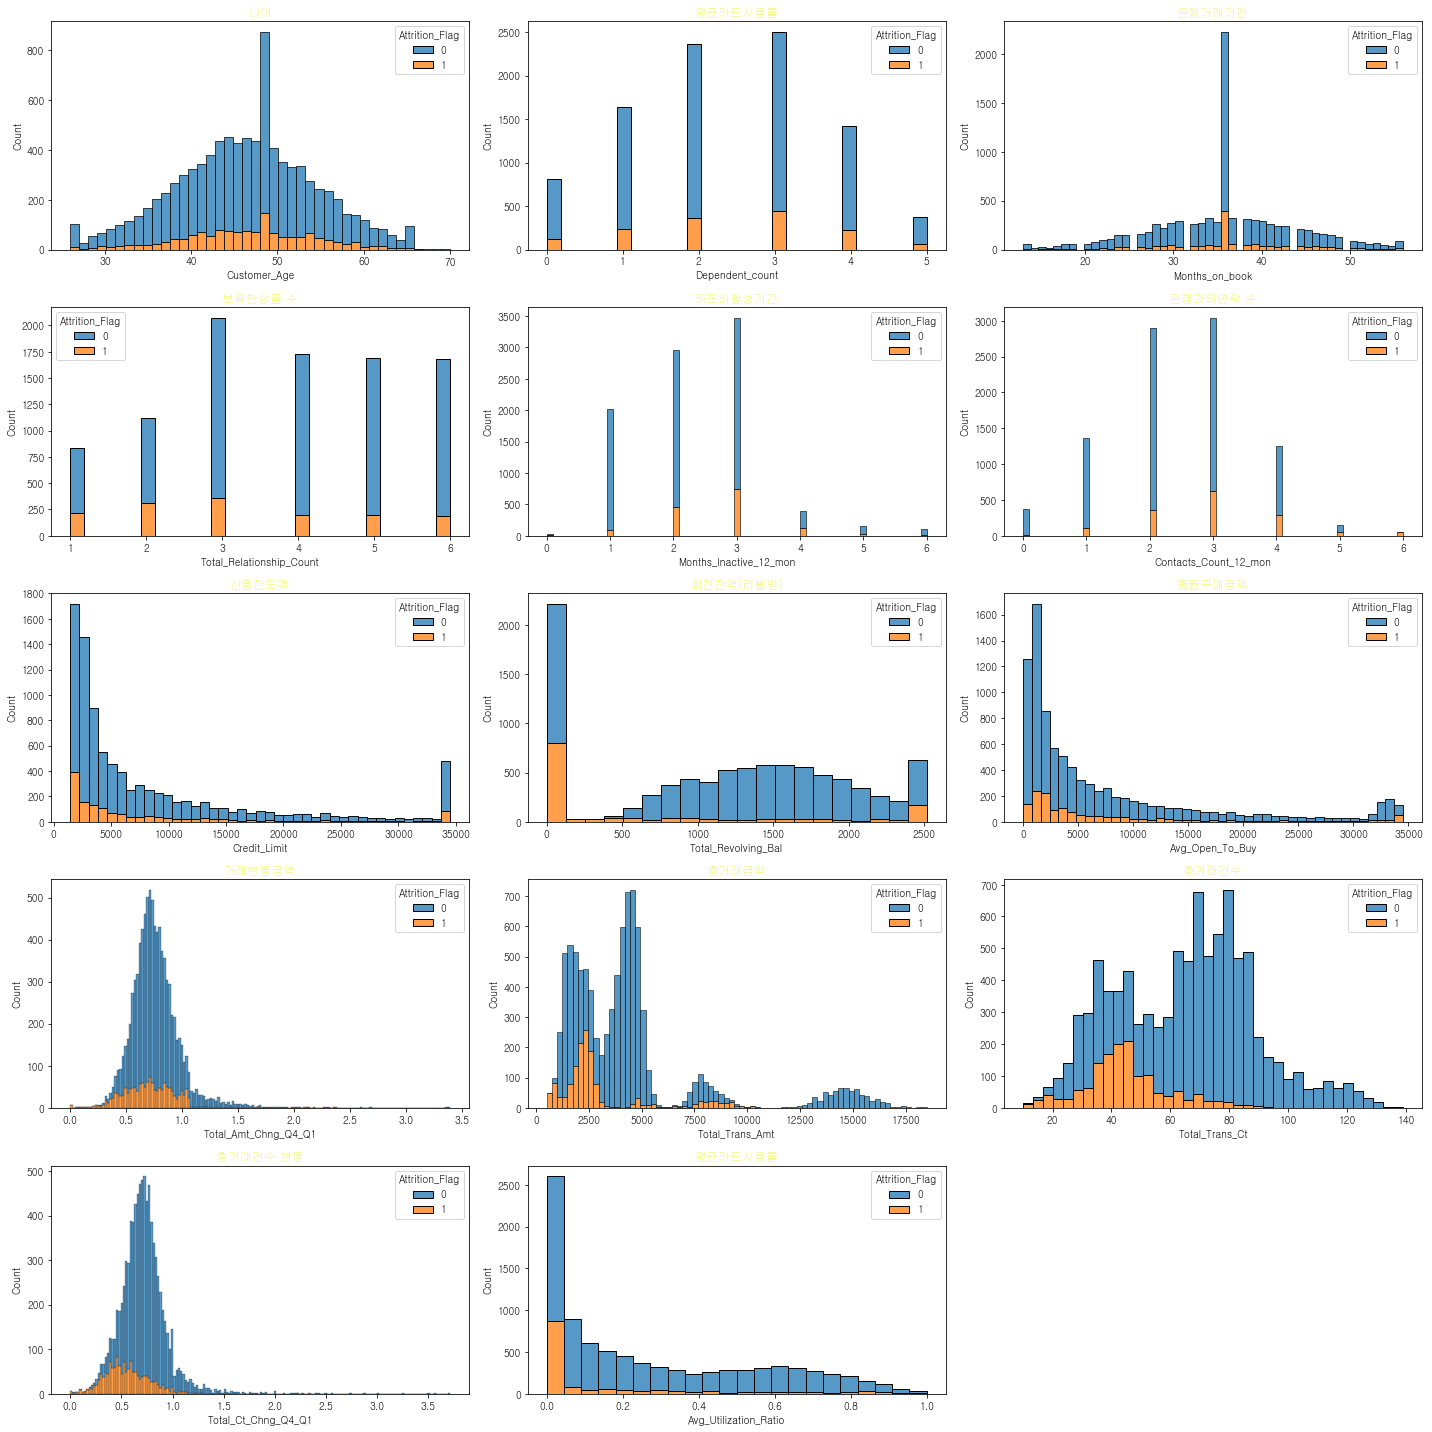

In [15]:
def plt_hue_num(df, num_var, target='Attrition_Flag', title=None, ax=None):
    
    if ax==None:
        fig, ax = plt.subplots()
    
    sns.histplot(df, x=num_var, hue=target, ax=ax, multiple="stack")

    if title==None:
        title=num_var
        if title == 'Customer_Age':
            title = '나이'
        elif title == 'Dependent_count ':
            title = '부양가족수'
        elif title == 'Months_on_book':
            title = '은행거래기간'
        elif title == 'Total_Relationship_Count':
            title = '보유한상품 수'
        elif title == 'Months_Inactive_12_mon':
            title = '카드비활성기간'
        elif title == 'Contacts_Count_12_mon':
            title = '은행과의연락 수'
        elif title == 'Credit_Limit':
            title = '신용한도액' 
        elif title == 'Total_Revolving_Bal':
            title = '회전잔액(리볼빙)'
        elif title == 'Avg_Open_To_Buy':
            title = '평균구매금액'
        elif title == 'Total_Amt_Chng_Q4_Q1':
            title = '거래변동금액'
        elif title == 'Total_Trans_Amt':
            title = '총거래금액' 
        elif title == 'Total_Trans_Ct':
            title = '총거래건수'
        elif title == 'Total_Ct_Chng_Q4_Q1':
            title = '총거래건수 변동'
        else:
            title = '평균카드사용률'
    ax.set_title(title, color='#F3F781', fontsize =40)
        
    ax.set_title(title)
    plt.tight_layout()
    
rows = len(num_vars)//3+1
fig, axes = plt.subplots(rows, 3, figsize=(20,20))
axes = axes.ravel()
axes[-1].remove()


for i in range(len(num_vars)):
    num_var = num_vars[i]
    plt_hue_num(churn, num_var, target='Attrition_Flag', ax=axes[i])    
    plt.tight_layout()  
plt.show()

In [ ]:
# plt.figure(figsize=(10,5))
# g= sns.countplot(x='Attrition_Flag', data=df);
# for p in g.patches:
#     height = p.get_height()
#     g.text(p.get_x()+p.get_width()/2.,
#             height/2,
#             '{}'.format(height),
#             ha="center", color='white')
# plt.title('Count values to target variable')

# <font color=#cccccc>결측치 확인 / Feature engineering & Feature selection</font>

### <font color=yellow>결측치 처리 방법 1. 결측치 포함 행 삭제</font>

#### <font color=yellow>Preprocessing categorical data (text -> number)</font>

In [16]:
data_df = df.copy()

In [17]:
# 결측치가 NaN 값으로 되어있지 않고, 'Unknown'으로 치환되어있어, 직접 결측치를 출력
data_df[data_df.iloc[:,:] == 'Unknown'].count()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [18]:
#Unknown을 삭제하였을때 총데이터에서 얼만큼이 날아가는지 알기위하여 출력해봄. / 3380행이 날아간다.
print(data_df['Education_Level'].value_counts())
print()
print(data_df['Marital_Status'].value_counts())
print()
print(data_df['Income_Category'].value_counts())
print()
total_Unknown = 1519+749+1112
print('total_Unknown : ',total_Unknown)

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

total_Unknown :  3380


In [19]:
#Unknown이 포함된 행을 삭제하기위해 NaN으로 치환한다.

catg_features = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category'] #범주형데이터열

# 결측치가 포함된 열을 알려주는 함수
def hasUnknown(feature): 
    result = 0
    for x in data_df[feature].str.contains('Unknown'):
        if x == True: #
            result = 1
    if result == 1:
        print('{} : has string "Unknown"!'.format(feature))

# Unknown문자열이 포함된 셀을 결측치(NaN)로 변형시키는 코드
for feature in catg_features: 
    hasUnknown(feature)
    data_df.loc[data_df[feature] == 'Unknown', feature] = np.nan 

data_df.info()

Education_Level : has string "Unknown"!
Marital_Status : has string "Unknown"!
Income_Category : has string "Unknown"!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           9015 non-null   object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 1

In [20]:
index_dicts = {}
for cat_feature in catg_features:
    data_df[cat_feature] = data_df[cat_feature].astype('category')
    idx_list = dict(enumerate(data_df[cat_feature].cat.categories)) 
    index_dicts[cat_feature] = idx_list
index_dicts

{'Gender': {0: 'F', 1: 'M'},
 'Education_Level': {0: 'College',
  1: 'Doctorate',
  2: 'Graduate',
  3: 'High School',
  4: 'Post-Graduate',
  5: 'Uneducated'},
 'Marital_Status': {0: 'Divorced', 1: 'Married', 2: 'Single'},
 'Income_Category': {0: '$120K +',
  1: '$40K - $60K',
  2: '$60K - $80K',
  3: '$80K - $120K',
  4: 'Less than $40K'},
 'Card_Category': {0: 'Blue', 1: 'Gold', 2: 'Platinum', 3: 'Silver'}}

In [21]:
# 문자열 카테고리를 index번호(카테고리번호)로 replace
for cat_feature in catg_features:
    for k,v in index_dicts[cat_feature].items():
        data_df[cat_feature].replace(v,k, inplace=True) 

# y 데이터 변환
data_df.Attrition_Flag = data_df.Attrition_Flag.apply(lambda x: 1 if 'Existing' in x else 0)

#### <font color=yellow>결측치 제거</font>



In [22]:
#결측치 제거
data_df.dropna(inplace=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7081 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            7081 non-null   int64   
 1   Customer_Age              7081 non-null   int64   
 2   Gender                    7081 non-null   category
 3   Dependent_count           7081 non-null   int64   
 4   Education_Level           7081 non-null   category
 5   Marital_Status            7081 non-null   category
 6   Income_Category           7081 non-null   category
 7   Card_Category             7081 non-null   category
 8   Months_on_book            7081 non-null   int64   
 9   Total_Relationship_Count  7081 non-null   int64   
 10  Months_Inactive_12_mon    7081 non-null   int64   
 11  Contacts_Count_12_mon     7081 non-null   int64   
 12  Credit_Limit              7081 non-null   float64 
 13  Total_Revolving_Bal       7081 non-null   int64

In [23]:
# 결측치를 제거하며, 빠진 인덱스값을 재정의

data_df = data_df.reset_index()
del data_df['index']
data_df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
4,1,44,1,2,2,1,1,0,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


In [24]:
#category int로 바꾸기 (pipeline이 category을 못알아먹음)
for cat_feature in catg_features:
    data_df[cat_feature] = data_df[cat_feature].astype(int)

### <font color=yellow>결측치 처리 방법 2. 결측치 채우기</font>

#### <font color=yellow>Preprocessing categorical data (text -> number)</font>

In [27]:
data_df = df.copy()

In [ ]:
catg_features = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category'] #범주형데이터열

# 결측치가 포함된 열을 알려주는 함수
def hasUnknown(feature): 
    result = 0
    for x in data_df[feature].str.contains('Unknown'):
        if x == True: #
            result = 1
    if result == 1:
        print('{} : has string "Unknown"!'.format(feature))

# Unknown문자열이 포함된 셀을 결측치(NaN)로 변형시키는 코드
for feature in catg_features: 
    hasUnknown(feature)
    data_df.loc[data_df[feature] == 'Unknown', feature] = np.nan 

data_df.info()

AttributeError: ignored

In [ ]:
# 범주형 변수 열 카테고리에 자동으로 부여될 index를 담는 딕셔너리 생성 코드
index_dicts = {}
for cat_feature in catg_features:
    data_df[cat_feature] = data_df[cat_feature].astype('category')
    idx_list = dict(enumerate(data_df[cat_feature].cat.categories)) 
    index_dicts[cat_feature] = idx_list
index_dicts

{'Card_Category': {0: 0, 1: 1, 2: 2, 3: 3},
 'Education_Level': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5},
 'Gender': {0: 0, 1: 1},
 'Income_Category': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
 'Marital_Status': {0: 0, 1: 1, 2: 2}}

In [ ]:
# 문자열 카테고리를 index번호(카테고리번호)로 replace
for cat_feature in catg_features:
    for k,v in index_dicts[cat_feature].items():
        data_df[cat_feature].replace(v,k, inplace=True) 

# y 데이터 변환
data_df.Attrition_Flag = data_df.Attrition_Flag.apply(lambda x: 1 if 'Existing' in x else 0)

TypeError: ignored

#### <font color=yellow>결측치 채우기</font>
참고) https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779 

In [ ]:
# 방법 1) KNNImputer로 결측치 추가
from sklearn.impute import KNNImputer

imputer_KNN = KNNImputer(n_neighbors=30)
df_filled_KNN = imputer_KNN.fit_transform(df)
df_filled_KNN = pd.DataFrame(df_filled_KNN).round(decimals=0)
df_filled_KNN.columns = sdf.columns
df_filled_KNN.head()

NameError: ignored

In [ ]:
#category int로 바꾸기 (pipeline이 category을 못알아먹음)
for cat_feature in catg_features:
    data_df[cat_feature] = data_df[cat_feature].astype(int)

<font color=#cccccc>correlation matrix</font>
==

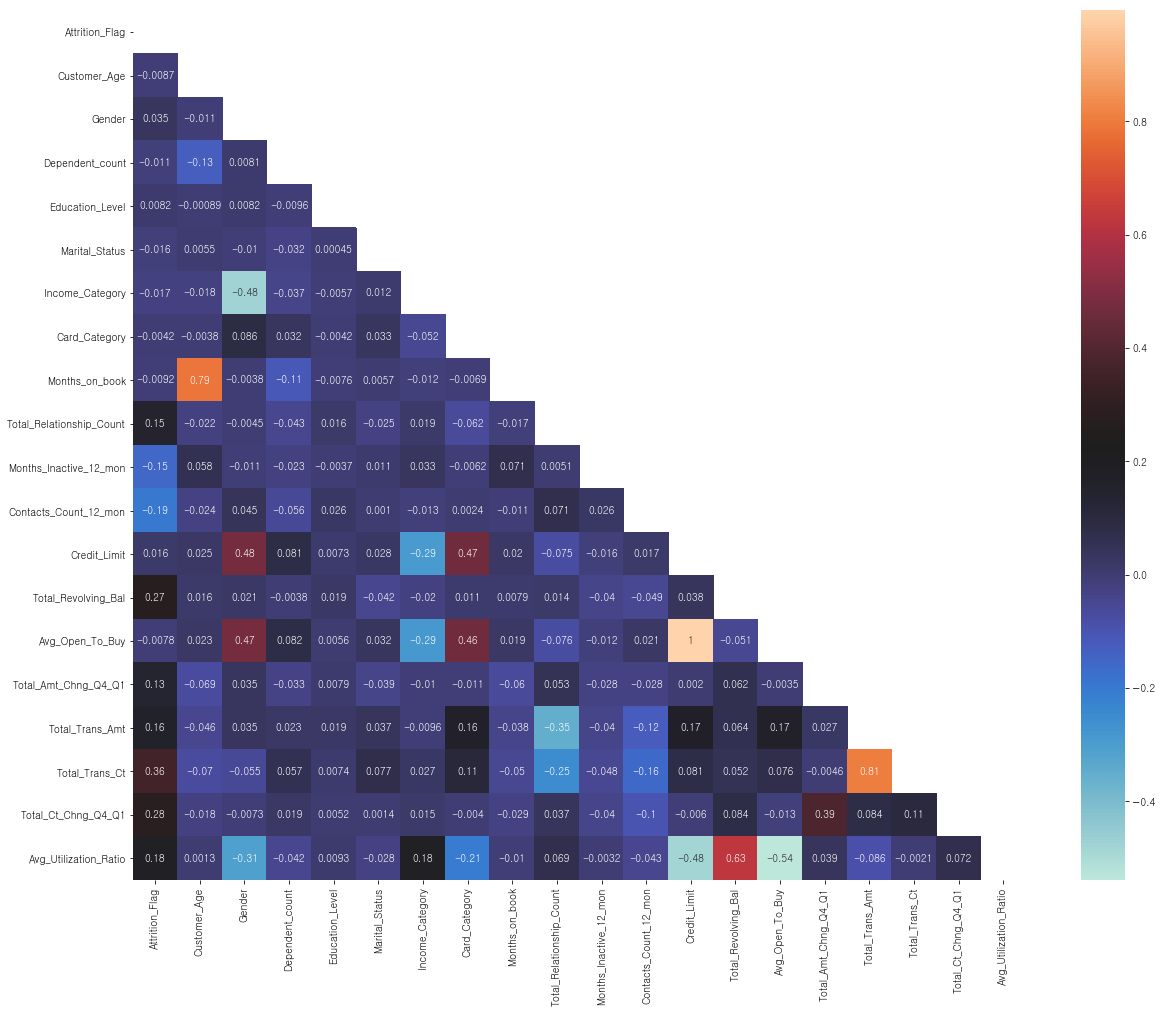

In [25]:
fig, ax = plt.subplots(figsize=(20, 16))
df_corr = data_df.corr(method="pearson")
mask = np.zeros_like(np.array(df_corr))
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(df_corr, mask=mask, annot=True, cmap='icefire')

#결측치도 채워진 상태이며, 크게 상관계수가 튄다고 생각되는 열이 없음 열삭제 없이 그냥 진행

<font color=#cccccc>데이터 분리</font>
==

In [26]:
x_data = data_df.drop(['Attrition_Flag'], axis=1)
y_data = data_df['Attrition_Flag']

<font color=#cccccc>Train the model</font>
==

In [27]:
x_train, x_test, y_train, y_test =\
model_selection.train_test_split(x_data, y_data, test_size=0.3, random_state=0)

### <font color=yellow>Feature Scaling(Pipeline)</font>

In [28]:
categorical_features = ['Card_Category', 'Education_Level', 'Gender', 'Income_Category', 'Marital_Status']
categorical_transformer = OneHotEncoder(categories='auto') # categories='auto' : just for ignoring warning messages

temp = list(data_df[data_df.columns.difference(categorical_features)].columns)
temp.remove('Attrition_Flag')

numeric_features = temp
numeric_transformer = StandardScaler()


preprocessor = ColumnTransformer(
    transformers=[ # List of (name, transformer, column(s))
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


preprocessor_pipe = Pipeline(steps=[('preprocessor', preprocessor)])

preprocessor_pipe.fit(x_train)

x_train_transformed = preprocessor_pipe.transform(x_train)
x_test_transformed = preprocessor_pipe.transform(x_test)

pd.DataFrame(x_train_transformed)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-0.748406,1.867430,-0.396875,-0.643042,-0.031516,0.503334,0.661574,0.382646,-0.072588,-0.248166,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.465262,-0.136514,1.409288,-0.483890,0.465118,-1.042699,-1.355504,0.506545,-0.529711,-0.227189,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.645385,-1.004532,-0.396875,-0.773617,-0.528149,0.503334,0.661574,-0.732443,-0.309941,-0.877476,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.661164,-0.843788,-0.396875,0.603356,-0.900624,-0.269682,1.670113,-0.236848,-0.274777,-0.206212,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.340494,-1.004532,0.506206,-0.468502,1.085910,-1.042699,1.670113,1.249938,0.498816,-0.420177,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,1.505764,-0.697332,-0.396875,1.598057,-0.900624,-1.042699,-0.346965,-0.856342,-0.024239,-0.105522,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4952,-0.256693,-0.450858,0.506206,-0.283961,-0.155674,-0.269682,-0.346965,-1.351937,-1.290118,0.053903,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4953,-0.630997,0.642202,-0.396875,-0.609849,-1.645575,-1.042699,0.661574,0.010950,-0.081379,-1.066269,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4954,1.285004,-1.004532,0.506206,1.158190,0.713435,0.503334,-1.355504,1.373837,-1.527470,-1.666211,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
pipeline_features = [x for x in x_data.columns if x not in categorical_features] #x_data의 열들 중 범주형 데이터를 제외한 열들 리스트에 담기

categorical_features = ['Card_Category', 'Education_Level', 'Gender', 'Income_Category', 'Marital_Status']


for category in categorical_features: #범주형 데이터속 범주들을 하나씩 꺼내어 열들에 추가하기
  for i in list(df[category].value_counts().keys()):
      pipeline_features.append(i)  

#위에 pipeline이 categorical_features 리스트 순서대로 들어갔기 때문에 순서 그대로 뽑아낸 코드

for i in range(pipeline_features.count('Unknown')): #겹쳐진 Unknown들 제거
  pipeline_features.remove('Unknown')

x_train_transformed_df = pd.DataFrame(x_train_transformed) #x_train_transformed로 df 만들기

x_train_transformed_df.columns = pipeline_features #x_train_transformed_df의 열들 이름을 pipeline_features 리스트로 변경

x_train_transformed_df

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,F,M,Less than $40K,$40K - $60K,$80K - $120K,$60K - $80K,$120K +,Married,Single,Divorced
0,-0.748406,1.867430,-0.396875,-0.643042,-0.031516,0.503334,0.661574,0.382646,-0.072588,-0.248166,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.465262,-0.136514,1.409288,-0.483890,0.465118,-1.042699,-1.355504,0.506545,-0.529711,-0.227189,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.645385,-1.004532,-0.396875,-0.773617,-0.528149,0.503334,0.661574,-0.732443,-0.309941,-0.877476,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.661164,-0.843788,-0.396875,0.603356,-0.900624,-0.269682,1.670113,-0.236848,-0.274777,-0.206212,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.340494,-1.004532,0.506206,-0.468502,1.085910,-1.042699,1.670113,1.249938,0.498816,-0.420177,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,1.505764,-0.697332,-0.396875,1.598057,-0.900624,-1.042699,-0.346965,-0.856342,-0.024239,-0.105522,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4952,-0.256693,-0.450858,0.506206,-0.283961,-0.155674,-0.269682,-0.346965,-1.351937,-1.290118,0.053903,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4953,-0.630997,0.642202,-0.396875,-0.609849,-1.645575,-1.042699,0.661574,0.010950,-0.081379,-1.066269,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4954,1.285004,-1.004532,0.506206,1.158190,0.713435,0.503334,-1.355504,1.373837,-1.527470,-1.666211,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### <font color=yellow>LogisticRegression, XGBClassifier, LGBMClassifier</font>

In [30]:
clf_models=[]
def run_model(model):
    if model == 'clf_LR':
        clf_LR = LogisticRegression(random_state=0)
        clf_LR.fit(x_train_transformed_df, y_train)
        clf_LR_pred=clf_LR.predict(x_test_transformed)
        print('   [LogisticRegression]')
        print(classification_report(y_test, clf_LR_pred, target_names=['Existing', 'Attrited']))
        clf_models.append(clf_LR_pred)
    elif model == 'clf_XGB':
        clf_XGB = XGBClassifier(random_state=0)
        clf_XGB.fit(x_train_transformed, y_train)
        clf_XGB_pred=clf_XGB.predict(x_test_transformed)
        print('   [XGBClassifier]')
        print(classification_report(y_test, clf_XGB_pred, target_names=['Existing', 'Attrited']))
        clf_models.append(clf_XGB_pred)    
    else:
        print('   [LGBMClassifier]')
        clf_LGBM = LGBMClassifier(random_state=0)
        clf_LGBM.fit(x_train_transformed_df, y_train)
        clf_LGBM_pred=clf_LGBM.predict(x_test_transformed)
        print('   [LGBMClassifier]')
        print(classification_report(y_test, clf_LGBM_pred, target_names=['Existing', 'Attrited']))     
        clf_models.append(clf_LGBM_pred) 
        clf_models.append(clf_LGBM)
    

clfs = ['clf_LR','clf_XGB','clf_LGBM']

for clf in clfs:
    run_model(clf)
    print('==========================================================')        

   [LogisticRegression]
              precision    recall  f1-score   support

    Existing       0.73      0.53      0.61       308
    Attrited       0.92      0.97      0.94      1817

    accuracy                           0.90      2125
   macro avg       0.83      0.75      0.78      2125
weighted avg       0.90      0.90      0.90      2125

   [XGBClassifier]
              precision    recall  f1-score   support

    Existing       0.95      0.84      0.89       308
    Attrited       0.97      0.99      0.98      1817

    accuracy                           0.97      2125
   macro avg       0.96      0.92      0.94      2125
weighted avg       0.97      0.97      0.97      2125

   [LGBMClassifier]
   [LGBMClassifier]
              precision    recall  f1-score   support

    Existing       0.92      0.90      0.91       308
    Attrited       0.98      0.99      0.98      1817

    accuracy                           0.97      2125
   macro avg       0.95      0.94      0.95  

### <font color=yellow>confusion_matrix</font>

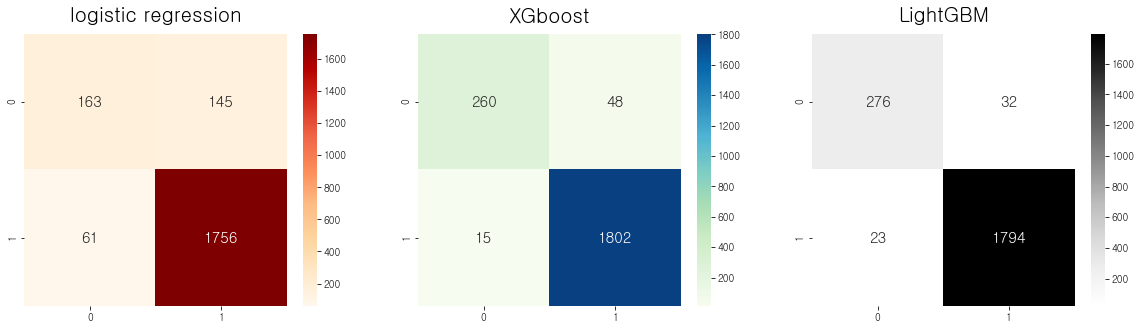

In [31]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(20, 5))

confu = confusion_matrix(y_true = y_test, y_pred = clf_models[0])
confu2 = confusion_matrix(y_true = y_test, y_pred = clf_models[1])
confu3 = confusion_matrix(y_true = y_test, y_pred = clf_models[2])


sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g', ax=ax[0])
sns.heatmap(confu2, annot=True, annot_kws={'size':15}, cmap='GnBu', fmt='.10g', ax=ax[1])
sns.heatmap(confu3, annot=True, annot_kws={'size':15}, cmap='Greys', fmt='.10g', ax=ax[2])
ax[0].set_title('logistic regression',pad = 12, fontsize = 20)
ax[1].set_title('XGboost',pad = 12, fontsize = 20)
ax[2].set_title('LightGBM',pad = 12, fontsize = 20)
plt.show()

### <font color=yellow>get important features</font>

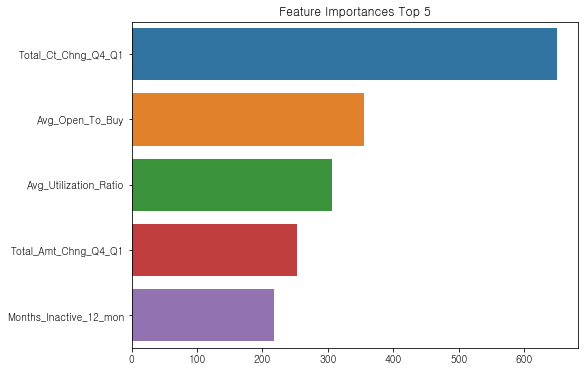

In [32]:
feature_importance_values = clf_models[3].feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=x_train_transformed_df.columns)
# 중요도값 순으로 Series를 정렬
feature_top20 = feature_importances.sort_values(ascending=False)[:5]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 5')
sns.barplot(x=feature_top20, y=feature_top20.index)
plt.show()

<font color=#cccccc>Rebalancing Samples</font>
==

### <font color=yellow>Resampling train-data</font>

In [33]:
# Random Oversampling
# sampling_strategy : 샘플링 전략
over_x_train, over_y_train = RandomOverSampler(sampling_strategy='minority').fit_resample(x_train, y_train)

# SMOTE
# 소수 데이터 중 특정 벡터 (샘플)와 가장 가까운 이웃 사이의 차이를 계산한다.
# 이 차이에 0과 1사이의 난수를 곱한다.
# 타겟 벡터에 추가한다.
# 두 개의 특정 기능 사이의 선분을 따라 임의의 점을 선택할 수 있다.
smote_x_train, smote_y_train = SMOTE().fit_resample(x_train,y_train)

# Boderline-SMOTE
# minority class에 속한 모든 example에 대하여 minor, major 구분 없이 nearest neighbor를 뽑는다.
# 뽑아낸 nearest neighbor 중 절반 이상이 majority class인 example을 DANGER 라고 하는데, 
# 이는 곧 borderline에 있는, 분류기가 어려워하는 example의 set을 의미한다.
# 경계에 있는 샘플들, 즉 DANGER set에 대하여 nearest neighbor들을 다시 뽑는다. 
# 이 때는 minority class에서만 뽑아낸다.
bdlsmote_x_train, bdlsmote_y_train = BorderlineSMOTE().fit_resample(x_train, y_train)

# Boderline-SMOTE SVM
#
bdlSVMsmote_x_train, bdlSVMsmote_y_train = SVMSMOTE().fit_resample(x_train, y_train)

# ADASYN
adasyn_x_train, adasyn_y_train = ADASYN().fit_resample(x_train, y_train)

# SMOTE-TomekLinks
# 클래스가 다른 두 데이터가 아주 가까이 붙어있으면 토멕링크가 된다.
# 토멕링크 방법은 이러한 토멕링크를 찾은 다음 그 중에서 다수 클래스에 속하는 
# 데이터를 제외하는 방법으로 경계선을 다수 클래스쪽으로 밀어붙이는 효과가 있다.
smotetomek_x_train, smotetomek_y_train = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')).fit_resample(x_train, y_train)

# SMOTE-ENN
smoteenn_x_train, smoteenn_y_train = SMOTEENN().fit_resample(x_train, y_train)


# StratifiedShuffleSplit (계층적 샘플링 시도)
split = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)
# StratifiedShuffleSplit의 메소드 split로 train, test를 분할할 index 생성
for train_index, test_index in split.split(x_data, y_data):
    sss_x_train, sss_x_test = x_data.loc[train_index], x_data.loc[test_index]
    sss_y_train, sss_y_test = y_data.loc[train_index], y_data.loc[test_index]

### <font color=yellow>Resampling result</font>

In [34]:
# Random Oversampling
print("Random Oversampling\n", over_y_train.value_counts())
# SMOTE
print("SMOTE\n", smote_y_train.value_counts())
# Boderline-SMOTE
print("Borderline-SMOTE\n", bdlsmote_y_train.value_counts())
# Boderline-SMOTE SVM
print("Borderline-SMOTE SVM\n", bdlSVMsmote_y_train.value_counts())
# ADASYN
print("ADASYN\n", adasyn_y_train.value_counts())
# SMOTE-TomekLinks
print("SMOTE-TomekLinks\n", smotetomek_y_train.value_counts())
# SMOTE-ENN
print("SMOTE-ENN\n", smoteenn_y_train.value_counts())

Random Oversampling
 1    4151
0    4151
Name: Attrition_Flag, dtype: int64
SMOTE
 1    4151
0    4151
Name: Attrition_Flag, dtype: int64
Borderline-SMOTE
 1    4151
0    4151
Name: Attrition_Flag, dtype: int64
Borderline-SMOTE SVM
 1    4151
0    4151
Name: Attrition_Flag, dtype: int64
ADASYN
 0    4165
1    4151
Name: Attrition_Flag, dtype: int64
SMOTE-TomekLinks
 1    4151
0    4021
Name: Attrition_Flag, dtype: int64
SMOTE-ENN
 0    3485
1    3277
Name: Attrition_Flag, dtype: int64


### <font color=yellow>Resampling result Visualize</font>

In [35]:
datasets = [x_train_transformed, y_train, over_x_train, over_y_train, smote_x_train, smote_y_train,
            bdlsmote_x_train, bdlsmote_y_train, bdlSVMsmote_x_train, bdlSVMsmote_y_train, 
            adasyn_x_train, adasyn_y_train, smotetomek_x_train, smotetomek_y_train, 
            smoteenn_x_train, smoteenn_y_train]

for dataset in datasets:
    pd.DataFrame(dataset)

In [36]:
train_concat = pd.concat([x_train, y_train], axis=1)
over_train_concat = pd.concat([over_x_train, over_y_train], axis=1)
smote_train_concat = pd.concat([smote_x_train, smote_y_train], axis=1)
bdlsmote_train_concat = pd.concat([bdlsmote_x_train, bdlsmote_y_train], axis=1)
bdlSVMsmote_train_concat = pd.concat([bdlSVMsmote_x_train, bdlSVMsmote_y_train], axis=1)
adasyn_train_concat = pd.concat([adasyn_x_train, adasyn_y_train], axis=1)
smotetomek_train_concat = pd.concat([smotetomek_x_train, smotetomek_y_train], axis=1)
smoteenn_train_concat = pd.concat([smoteenn_x_train, smoteenn_y_train], axis=1)

Text(0.5, 1.0, 'SMOTE-ENN')

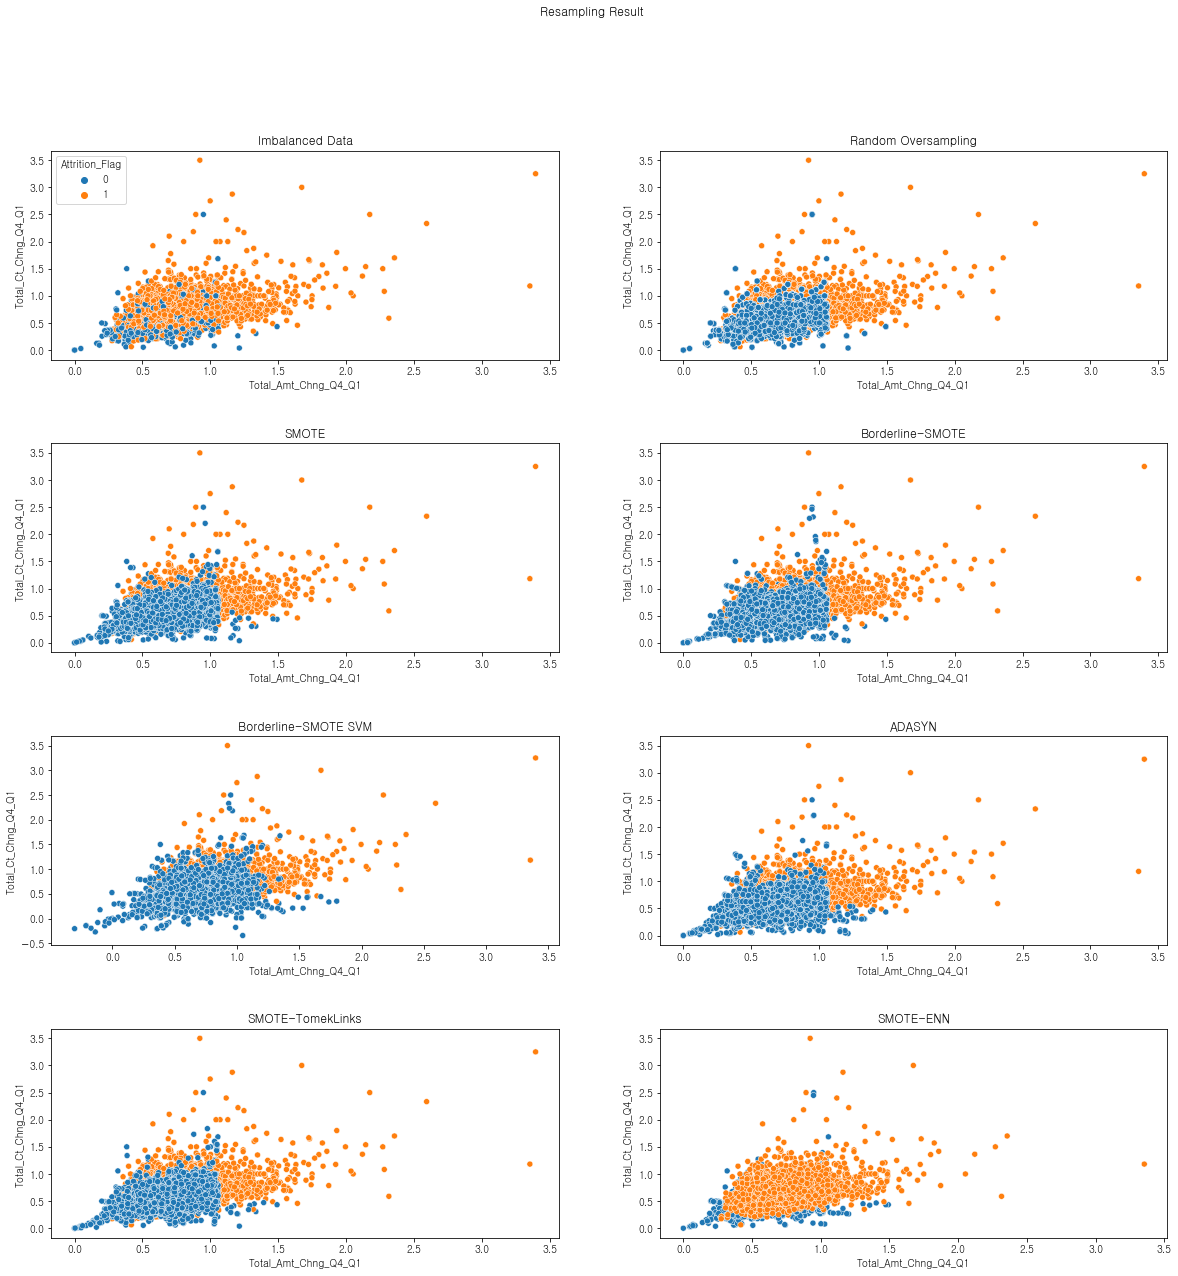

In [53]:
# Visualize resampling results
fig, axes = plt.subplots(4, 2, figsize=(20, 20),squeeze=True)
plt.subplots_adjust(wspace=0.2, hspace=0.4)
fig.suptitle('Resampling Result')

sns.scatterplot(ax=axes[0, 0], data=train_concat, x='Total_Amt_Chng_Q4_Q1', y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag')
sns.scatterplot(ax=axes[0, 1], data=over_train_concat, x='Total_Amt_Chng_Q4_Q1', y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag', legend=False)
sns.scatterplot(ax=axes[1, 0], data=smote_train_concat, x='Total_Amt_Chng_Q4_Q1', y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag',legend=False)
sns.scatterplot(ax=axes[1, 1], data=bdlsmote_train_concat, x='Total_Amt_Chng_Q4_Q1', y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag',legend=False)
sns.scatterplot(ax=axes[2, 0], data=bdlSVMsmote_train_concat, x='Total_Amt_Chng_Q4_Q1', y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag',legend=False)
sns.scatterplot(ax=axes[2, 1], data=adasyn_train_concat, x='Total_Amt_Chng_Q4_Q1', y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag',legend=False)
sns.scatterplot(ax=axes[3, 0], data=smotetomek_train_concat, x='Total_Amt_Chng_Q4_Q1', y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag',legend=False)
sns.scatterplot(ax=axes[3, 1], data=smoteenn_train_concat, x='Total_Amt_Chng_Q4_Q1', y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag',legend=False)

axes[0, 0].set_title("Imbalanced Data")
axes[0, 1].set_title("Random Oversampling")
axes[1, 0].set_title("SMOTE")
axes[1, 1].set_title("Borderline-SMOTE")
axes[2, 0].set_title("Borderline-SMOTE SVM")
axes[2, 1].set_title("ADASYN")
axes[3, 0].set_title("SMOTE-TomekLinks")
axes[3, 1].set_title("SMOTE-ENN")

<font color=#cccccc>Re_Train the model</font>
==

### <font color=yellow>LogisticRegression, XGBClassifier, LGBMClassifier</font>

In [38]:
x_train_transformed_resample = preprocessor_pipe.transform(over_x_train)
x_test_transformed_resample = preprocessor_pipe.transform(x_test)

In [39]:
clf_balance_models=[]
def run_model_Balance(balance_model):
    if balance_model == 'clf_LR2':
        clf_LR2 = LogisticRegression(random_state=0)
        clf_LR2.fit(x_train_transformed_resample, over_y_train)
        clf_LR_pred2=clf_LR2.predict(x_test_transformed_resample)
        print('   [LogisticRegression]')
        print(classification_report(y_test, clf_LR_pred2, target_names=['Existing', 'Attrited']))
        clf_balance_models.append(clf_LR_pred2)
    elif balance_model == 'clf_XGB2':
        clf_XGB2 = XGBClassifier(random_state=0)
        clf_XGB2.fit(x_train_transformed_resample, over_y_train)
        clf_XGB_pred2=clf_XGB2.predict(x_test_transformed_resample)
        print('   [XGBClassifier]')
        print(classification_report(y_test, clf_XGB_pred2, target_names=['Existing', 'Attrited']))
        clf_balance_models.append(clf_XGB_pred2)    
    else:
        clf_LGBM2 = LGBMClassifier(random_state=0)
        clf_LGBM2.fit(x_train_transformed_resample, over_y_train)
        clf_LGBM_pred2=clf_LGBM2.predict(x_test_transformed_resample)
        print('   [LGBMClassifier]')
        print(classification_report(y_test, clf_LGBM_pred2, target_names=['Existing', 'Attrited']))     
        clf_balance_models.append(clf_LGBM_pred2) 
        clf_balance_models.append(clf_LGBM2)
    

balance_clfs = ['clf_LR2','clf_XGB2','clf_LGBM2']

for clf2 in balance_clfs:
    run_model_Balance(clf2)
    print('==========================================================')        

   [LogisticRegression]
              precision    recall  f1-score   support

    Existing       0.47      0.86      0.61       308
    Attrited       0.97      0.83      0.90      1817

    accuracy                           0.84      2125
   macro avg       0.72      0.85      0.75      2125
weighted avg       0.90      0.84      0.86      2125

   [XGBClassifier]
              precision    recall  f1-score   support

    Existing       0.75      0.94      0.84       308
    Attrited       0.99      0.95      0.97      1817

    accuracy                           0.95      2125
   macro avg       0.87      0.95      0.90      2125
weighted avg       0.96      0.95      0.95      2125

   [LGBMClassifier]
              precision    recall  f1-score   support

    Existing       0.88      0.94      0.91       308
    Attrited       0.99      0.98      0.98      1817

    accuracy                           0.97      2125
   macro avg       0.94      0.96      0.95      2125
weighted av

### <font color=yellow>confusion_matrix</font>

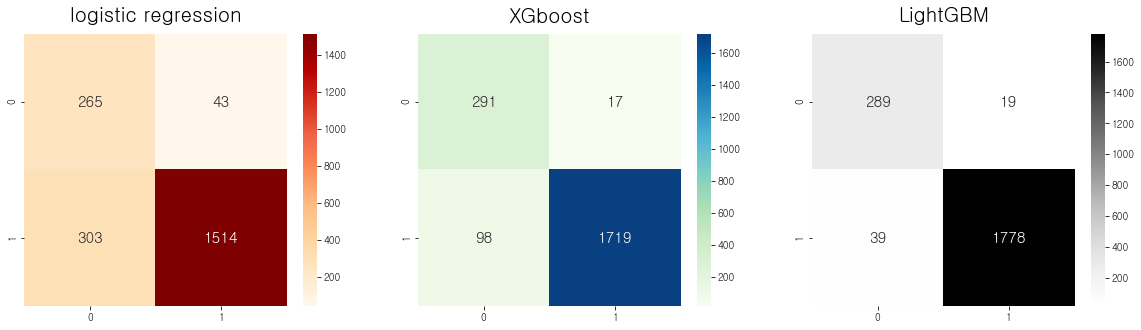

In [40]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(20, 5))

confu = confusion_matrix(y_true = y_test, y_pred = clf_balance_models[0])
confu2 = confusion_matrix(y_true = y_test, y_pred = clf_balance_models[1])
confu3 = confusion_matrix(y_true = y_test, y_pred = clf_balance_models[2])


sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g', ax=ax[0])
sns.heatmap(confu2, annot=True, annot_kws={'size':15}, cmap='GnBu', fmt='.10g', ax=ax[1])
sns.heatmap(confu3, annot=True, annot_kws={'size':15}, cmap='Greys', fmt='.10g', ax=ax[2])
ax[0].set_title('logistic regression',pad = 12, fontsize = 20)
ax[1].set_title('XGboost',pad = 12, fontsize = 20)
ax[2].set_title('LightGBM',pad = 12, fontsize = 20)
plt.show()

<font color=#cccccc> Model stacking</font>
==

In [41]:
models = [ LogisticRegression(random_state=0),
           XGBClassifier(random_state=0),
           LGBMClassifier(random_state=0)] 

In [42]:
S_train, S_test = stacking(models, 
                           x_train_transformed_resample, over_y_train, x_test_transformed_resample, 
                           regression = False, 
                           metric = accuracy_score, 
                           n_folds = 4, stratified = True, shuffle = True, 
                           random_state = 0, verbose = 0) 

D:\Programing\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Programing\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regress

In [43]:
pd.DataFrame(S_train)
clf_STACK = LGBMClassifier(seed = 0, \
                               n_jobs = -1,\
                               learning_rate = 0.08,\
                               n_estimators = 70,\
                               max_depth = 3)
clf_STACK = clf_STACK.fit(S_train, over_y_train)
clf_STACK_pred = clf_STACK.predict_proba(S_test) 
print('Final prediction score: [%.4f]' % accuracy_score(y_test, clf_balance_models[3].predict(x_test_transformed_resample)))

Final prediction score: [0.9727]



<font color=#cccccc>AUC score of other model</font>
==

In [44]:
models = {"K-Nearest Neighbors   ": KNeighborsClassifier(),
          "Support Vector Machine": SVC(probability=True),
          "Decision Tree         ": DecisionTreeClassifier(),
          "Random Forest         ": RandomForestClassifier(),
          "Ada Boost             ": AdaBoostClassifier(),}

### <font color=yellow>Random Oversampling</font>

In [45]:
for name, model in models.items():
    model.fit(x_train_transformed_resample, over_y_train)

# Print AUC score
print("Random Oversampling: AUC score")
for name, model in models.items():
    print(name + ": {:.3f}".format(roc_auc_score(y_test, model.predict(x_test_transformed_resample))))

Random Oversampling: AUC score
K-Nearest Neighbors   : 0.835
Support Vector Machine: 0.902
Decision Tree         : 0.880
Random Forest         : 0.884
Ada Boost             : 0.930


### <font color=yellow>SMOTE</font>

In [46]:
smote_resample = preprocessor_pipe.transform(smote_x_train)

# Fit the models: SMOTE
for name, model in models.items():
    model.fit(smote_resample, smote_y_train)

# Print AUC score
print("SMOTE: AUC score")
for name, model in models.items():
    print(name + ": {:.3f}".format(roc_auc_score(y_test, model.predict(x_test_transformed))))

SMOTE: AUC score
K-Nearest Neighbors   : 0.836
Support Vector Machine: 0.872
Decision Tree         : 0.898
Random Forest         : 0.895
Ada Boost             : 0.912


### <font color=yellow>Borderline-SMOTE</font>

In [47]:
bdlsmote_resample = preprocessor_pipe.transform(bdlsmote_x_train)
# Fit the models: Borderline-SMOTE
for name, model in models.items():
    model.fit(bdlsmote_resample, bdlsmote_y_train)

# Print AUC score
print("Borderline-SMOTE: AUC score")
for name, model in models.items():
    print(name + ": {:.3f}".format(roc_auc_score(y_test, model.predict(x_test_transformed))))

Borderline-SMOTE: AUC score
K-Nearest Neighbors   : 0.824
Support Vector Machine: 0.863
Decision Tree         : 0.877
Random Forest         : 0.912
Ada Boost             : 0.919


# <font color=#cccccc>Hyper parameter optimize</font>

In [48]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[10,20,30],\
             'n_estimators':[300,200,100],\
              'learning_rate':[0.01,0.03],
             'boosting_type':['goss','gbdt']}

grid_LGB = GridSearchCV(clf_balance_models[3] , param_grid=parameters , scoring='accuracy',\
                        cv=5, refit=True)
grid_LGB.fit(x_train_transformed_resample , over_y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_LGB.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_LGB.best_score_))
best_LGB = grid_LGB.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_LGB.predict(x_test_transformed_resample)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 LGBMClassifier 정확도 : {0:.4f}'.format(accuracy))

df_LGB = pd.DataFrame(grid_LGB.cv_results_)
pd.set_option('display.max.colwidth', 200)
df_LGB[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]\
.sort_values('rank_test_score').head(10)

GridSearchCV 최적 하이퍼 파라미터 : {'boosting_type': 'goss', 'learning_rate': 0.03, 'max_depth': 20, 'n_estimators': 300}
GridSearchCV 최고 정확도: 0.9878
테스트 세트에서의 LGBMClassifier 정확도 : 0.9751


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
15,"{'boosting_type': 'goss', 'learning_rate': 0.03, 'max_depth': 30, 'n_estimators': 300}",0.987834,1,0.988561,0.989163,0.990361
12,"{'boosting_type': 'goss', 'learning_rate': 0.03, 'max_depth': 20, 'n_estimators': 300}",0.987834,1,0.988561,0.989163,0.990361
27,"{'boosting_type': 'gbdt', 'learning_rate': 0.03, 'max_depth': 10, 'n_estimators': 300}",0.986991,3,0.987357,0.989163,0.988554
33,"{'boosting_type': 'gbdt', 'learning_rate': 0.03, 'max_depth': 30, 'n_estimators': 300}",0.986750,4,0.987959,0.987959,0.988554
30,"{'boosting_type': 'gbdt', 'learning_rate': 0.03, 'max_depth': 20, 'n_estimators': 300}",0.986750,4,0.987959,0.987959,0.988554
9,"{'boosting_type': 'goss', 'learning_rate': 0.03, 'max_depth': 10, 'n_estimators': 300}",0.986750,4,0.988561,0.987357,0.988554
13,"{'boosting_type': 'goss', 'learning_rate': 0.03, 'max_depth': 20, 'n_estimators': 200}",0.983498,7,0.985551,0.981939,0.987349
16,"{'boosting_type': 'goss', 'learning_rate': 0.03, 'max_depth': 30, 'n_estimators': 200}",0.983498,7,0.985551,0.981939,0.987349
34,"{'boosting_type': 'gbdt', 'learning_rate': 0.03, 'max_depth': 30, 'n_estimators': 200}",0.983498,7,0.985551,0.981939,0.987349
31,"{'boosting_type': 'gbdt', 'learning_rate': 0.03, 'max_depth': 20, 'n_estimators': 200}",0.983498,7,0.985551,0.981939,0.987349


# <font color=#cccccc>DL Model 적용</font>

### <font color=yellow>Library Import</font>

In [49]:
import tensorflow as tf


from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics
from sklearn import preprocessing

import os
tf.logging.set_verbosity(tf.logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [50]:
print(x_train_transformed_resample.shape)
print(over_y_train.shape)
print(x_test_transformed_resample.shape)
print(y_test.shape)

y_test = y_test.values.reshape(-1,1)
over_y_train = over_y_train.values.reshape(-1,1)
print('===========y data 2차원으로 변환==============')
print(x_train_transformed_resample.shape)
print(over_y_train.shape)
print(x_test_transformed_resample.shape)
print(y_test.shape)

(8302, 34)
(8302,)
(2125, 34)
(2125,)
===========y data 2차원으로 변환==============
(8302, 34)
(8302, 1)
(2125, 34)
(2125, 1)


### <font color=yellow>1st_elu_hidden layer3_Dropout</font>

In [61]:
enc = preprocessing.OneHotEncoder(categories='auto')

train_label = enc.fit_transform(over_y_train).toarray()
test_label = enc.fit_transform(y_test).toarray()

print(train_label.shape)
print(test_label.shape) 


model = models.Sequential() # Build up the "Sequence" of layers (Linear stack of layers)

# Dense-layer (with he-initialization)
model.add(layers.Dense(input_dim=34, units=256, activation=None, kernel_initializer=initializers.he_uniform())) # he-uniform initialization
# model.add(layers.BatchNormalization()) # Use this line as if needed
model.add(layers.Activation('elu')) # elu or relu (or layers.ELU / layers.LeakyReLU)

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 
model.add(layers.Dropout(rate=0.5)) # Dropout-layer

model.add(layers.Dense(units=2, activation='softmax')) # Apply softmax function on model's output



model.compile(optimizer=optimizers.Adam(), # Please try the Adam-optimizer
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy])


history = model.fit(x_train_transformed_resample, train_label, batch_size=100, epochs=20, validation_split=0.3) 

(8302, 2)
(2125, 2)
Train on 5811 samples, validate on 2491 samples
Epoch 1/20
5811/5811 [==============================] - 2s 351us/sample - loss: 0.5042 - categorical_accuracy: 0.8379 - val_loss: 0.4894 - val_categorical_accuracy: 0.7720
Epoch 2/20
5811/5811 [==============================] - 1s 149us/sample - loss: 0.2976 - categorical_accuracy: 0.8885 - val_loss: 0.3574 - val_categorical_accuracy: 0.8434
Epoch 3/20
5811/5811 [==============================] - 1s 166us/sample - loss: 0.2605 - categorical_accuracy: 0.8962 - val_loss: 0.3269 - val_categorical_accuracy: 0.8442
Epoch 4/20
5811/5811 [==============================] - 1s 146us/sample - loss: 0.2100 - categorical_accuracy: 0.9157 - val_loss: 0.3701 - val_categorical_accuracy: 0.8350
Epoch 5/20
5811/5811 [==============================] - 1s 178us/sample - loss: 0.1791 - categorical_accuracy: 0.9258 - val_loss: 0.1928 - val_categorical_accuracy: 0.9277
Epoch 6/20
5811/5811 [==============================] - 1s 145us/sample 

In [62]:
result = model.evaluate(x_test_transformed_resample, test_label)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

2125/2125 [==============================] - 0s 61us/sample - loss: 0.2216 - categorical_accuracy: 0.9369
loss (cross-entropy) : 0.2215742005881141
test accuracy : 0.93694115


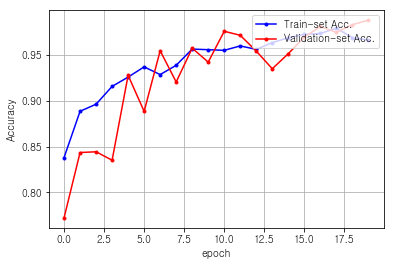

In [63]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

x_len = np.arange(len(acc))

plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

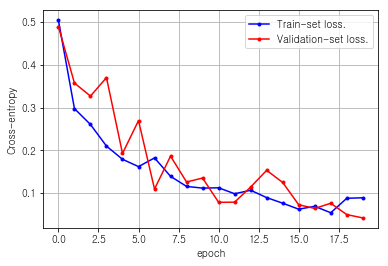

In [64]:
loss = history.history['loss']
val_loss = history.history['val_loss']

x_len = np.arange(len(acc))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Cross-entropy')
plt.show()

### <font color=yellow>2nd_relu_hidden layer1_Dropout</font>

In [65]:
model_over_relu_R = models.Sequential() # Build up the "Sequence" of layers (Linear stack of layers)

# Dense-layer (with he-initialization)
model_over_relu_R.add(layers.Dense(input_dim=34, units=256, activation=None, kernel_initializer=initializers.he_uniform())) # he-uniform initialization
# model.add(layers.BatchNormalization()) # Use this line as if needed
model_over_relu_R.add(layers.Activation('relu')) # elu or relu (or layers.ELU / layers.LeakyReLU)

model_over_relu_R.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model_over_relu_R.add(layers.Activation('relu')) 

model_over_relu_R.add(layers.Dropout(rate=0.2)) # Dropout-layer

model_over_relu_R.add(layers.Dense(units=2, activation='softmax')) 

model_over_relu_R.compile(optimizer=optimizers.Adam(), # Please try the Adam-optimizer, Adam(학습률)
              loss=losses.binary_crossentropy, 
              metrics=[tf.keras.metrics.Recall()])

history_rec = model_over_relu_R.fit(x_train_transformed_resample, train_label, batch_size=10, epochs=20, validation_split=0.3) 

Train on 5811 samples, validate on 2491 samples
Epoch 1/20
5811/5811 [==============================] - 3s 575us/sample - loss: 0.3085 - recall: 0.8752 - val_loss: 0.3877 - val_recall: 0.8125
Epoch 2/20
5811/5811 [==============================] - 2s 406us/sample - loss: 0.2070 - recall: 0.9181 - val_loss: 0.3336 - val_recall: 0.8462
Epoch 3/20
5811/5811 [==============================] - 3s 431us/sample - loss: 0.1709 - recall: 0.9306 - val_loss: 0.2802 - val_recall: 0.8824
Epoch 4/20
5811/5811 [==============================] - 2s 426us/sample - loss: 0.1333 - recall: 0.9458 - val_loss: 0.1940 - val_recall: 0.9249
Epoch 5/20
5811/5811 [==============================] - 2s 422us/sample - loss: 0.1145 - recall: 0.9568 - val_loss: 0.0762 - val_recall: 0.9747
Epoch 6/20
5811/5811 [==============================] - 3s 435us/sample - loss: 0.1040 - recall: 0.9613 - val_loss: 0.1285 - val_recall: 0.9582
Epoch 7/20
5811/5811 [==============================] - 3s 457us/sample - loss: 0.0747 -

In [66]:
result = model_over_relu_R.evaluate(x_test_transformed_resample, test_label)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

2125/2125 [==============================] - 0s 38us/sample - loss: 0.3892 - recall: 0.9275
loss (cross-entropy) : 0.38924794905325943
test accuracy : 0.9275294


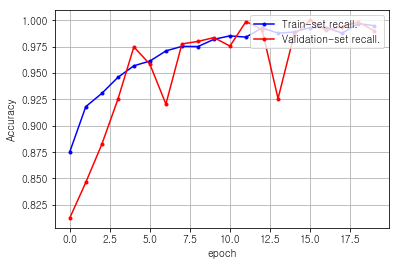

In [68]:
acc = history_rec.history['recall']
val_acc = history_rec.history['val_recall']

x_len = np.arange(len(acc))

plt.plot(x_len, acc, marker='.', c='blue', label="Train-set recall.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set recall.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
history_rec.history

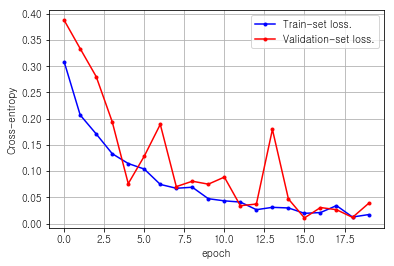

In [69]:
loss = history_rec.history['loss']
val_loss = history_rec.history['val_loss']

x_len = np.arange(len(acc))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Cross-entropy')
plt.show()